In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
#import sima

In [2]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    
    from: `StackOverflow <http://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries>`_
    '''
    data = sio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

def createBuckets (cai1result,cai1deconvo,bucketNumber):
    
    '''
    take: actual spike train, deconvolved spike train, number of buckets 
    return: n x bucketsize matrix containing firing rates in buckets, relative to the max value per trace
    '''
    biggernum = max(cai1result.shape)
    smallernum = min(cai1result.shape)
    stepWidth = (biggernum)/bucketNumber
    caiResultBucket = np.zeros((smallernum,bucketNumber))
    for i,col in enumerate(cai1result.T):
        for j in range(0,bucketNumber):
            caiResultBucket[i,j] = sum(col[j*stepWidth:j*stepWidth+stepWidth]) 
    for i in caiResultBucket:
        i[...] = i/max(i)

    biggernum = max(cai1deconvo.shape)
    smallernum = min(cai1deconvo.shape)
    stepWidth = biggernum/bucketNumber
    
    caiDeconvoBucket = np.zeros((smallernum,bucketNumber))
    
    for i,col in enumerate(cai1deconvo.T):
        for j in range(0,bucketNumber):
            caiDeconvoBucket[i,j] = sum(col[j*stepWidth:j*stepWidth+stepWidth])
    for i in caiDeconvoBucket:
        i[...] = i / max(i)

    return(np.nan_to_num(caiResultBucket),np.nan_to_num(caiDeconvoBucket))

def _loadGiniFile(fileList,path):
    apReturn = []
    valueList = []
    for cell in (fileList):
        apCollumn = _todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][4])['valueMatrix']
        valueCollumn = _todict(loadmat(path+cell.strip())['obj']['timeSeriesArrayHash']['value'][0])['valueMatrix']
        valueList.append(valueCollumn)
        stepwidth = len(apCollumn)/len(valueCollumn)
        apList = []
        
        for pos in range(len(valueCollumn)):
            thisStep = apCollumn[pos*stepwidth:pos*stepwidth+stepwidth]
            #thisStep = thisStep[~np.isnan(thisStep)]
            apList.append(sum(thisStep))
        apReturn.append(apList)
    caiFrame = pd.DataFrame(data=apReturn,index=range(len(apReturn)))
    valueFrame = pd.DataFrame(data=valueList,index=range(len(valueList)))
    return(valueFrame,caiFrame)

def rankByIndex(inputList):
    returnList = []
    for i in range(len(inputList)):
        highPos = np.argmax(inputList)
        returnList.append(highPos)
        inputList[highPos] = 0
    return(returnList)

In [ ]:
fileString5 = "data_20120502_cell1_001.mat  data_20120502_cell4_002.mat  data_20120521_cell2_002.mat  data_20120521_cell4_003.mat  data_20120521_cell5_006.mat  data_20120502_cell1_002.mat  data_20120502_cell4_003.mat  data_20120521_cell2_003.mat  data_20120521_cell4_004.mat  data_20120521_cell5_007.mat  data_20120502_cell1_004.mat  data_20120510_cell1_001.mat  data_20120521_cell3_001.mat  data_20120521_cell4_005.mat  data_20120521_cell7_001.mat  data_20120502_cell1_005.mat  data_20120510_cell1_002.mat  data_20120521_cell3_002.mat  data_20120521_cell4_006.mat  data_20120521_cell7_002.mat  data_20120502_cell3_001.mat  data_20120521_cell10_002.mat  data_20120521_cell3_003.mat  data_20120521_cell4_007.mat  data_20120521_cell7_003.mat  data_20120502_cell3_002.mat  data_20120521_cell10_003.mat  data_20120521_cell3_004.mat  data_20120521_cell5_003.mat  data_20120502_cell3_003.mat  data_20120521_cell10_004.mat  data_20120521_cell3_005.mat  data_20120521_cell5_004.mat  data_20120502_cell4_001.mat  data_20120521_cell1_001.mat  data_20120521_cell4_002.mat  data_20120521_cell5_005.mat".split("  ")
path = "/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/GCaMP6f_11cells_Chen2013/"
cai1_11cell13 = _loadGiniFile(fileString5,path)

In [47]:
fileString5 = "data_20120502_cell1_001.mat  data_20120502_cell4_002.mat  data_20120521_cell2_002.mat  data_20120521_cell4_003.mat  data_20120521_cell5_006.mat  data_20120502_cell1_002.mat  data_20120502_cell4_003.mat  data_20120521_cell2_003.mat  data_20120521_cell4_004.mat  data_20120521_cell5_007.mat  data_20120502_cell1_004.mat  data_20120510_cell1_001.mat  data_20120521_cell3_001.mat  data_20120521_cell4_005.mat  data_20120521_cell7_001.mat  data_20120502_cell1_005.mat  data_20120510_cell1_002.mat  data_20120521_cell3_002.mat  data_20120521_cell4_006.mat  data_20120521_cell7_002.mat  data_20120502_cell3_001.mat  data_20120521_cell10_002.mat  data_20120521_cell3_003.mat  data_20120521_cell4_007.mat  data_20120521_cell7_003.mat  data_20120502_cell3_002.mat  data_20120521_cell10_003.mat  data_20120521_cell3_004.mat  data_20120521_cell5_003.mat  data_20120502_cell3_003.mat  data_20120521_cell10_004.mat  data_20120521_cell3_005.mat  data_20120521_cell5_004.mat  data_20120502_cell4_001.mat  data_20120521_cell1_001.mat  data_20120521_cell4_002.mat  data_20120521_cell5_005.mat".split("  ")
path = "/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/GCaMP6f_11cells_Chen2013/"
cai1_11cell13 = _loadGiniFile(fileString5,path)

In [41]:
fileString4 = "data_071411_cell1_005.mat  data_080311_cell2_001.mat  data_080511_cell7_002.mat  data_082611_cell2_001.mat  data_090711_cell4003.mat  data_072711_cell2_002.mat  data_080511_cell12_002.mat  data_082611_cell1_002.mat  data_090111_cell1002.mat".split("  ")
path = "/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/GCaMP5k_9cells_Akerboom2012/"
cai1_9cell12 = _loadGiniFile(fileString4, path)

In [48]:
fileString6 = "data_20120416_cell1_001.mat  data_20120417_cell3_003.mat  data_20120515_cell1_003.mat  data_20120627_cell2_002.mat	  data_20120627_cell4_005.mat  data_20120416_cell1_002.mat  data_20120417_cell4_001.mat  data_20120515_cell1_004.mat  data_20120627_cell3_001.mat   data_20120417_cell1_002.mat  data_20120417_cell4_002.mat  data_20120515_cell1_005.mat  data_20120627_cell3_002.mat  data_20120417_cell3_001.mat  data_20120417_cell4_003.mat  data_20120515_cell1_006.mat  data_20120627_cell4_002.mat  data_20120417_cell3_002.mat  data_20120417_cell5_002.mat  data_20120627_cell2_001.mat  data_20120627_cell4_004.mat".split("  ")
path = "/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/GCaMP6s_9cells_Chen2013/"
cai1_9cell13 = _loadGiniFile(fileString6,path)

In [44]:
#cai1_9cell12APs = (cai1_9cell12[1].as_matrix().transpose())
#cai1_9cell12 = (cai1_9cell12[0].as_matrix().transpose())
np.savetxt("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/9cell12APs.csv",cai1_9cell12APs,delimiter=" ",fmt="%1.0f")
np.savetxt("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/9cell12.csv",cai1_9cell12,delimiter=" ",fmt="%1.0f")

In [100]:
cai1_9cell13APs = (cai1_9cell13[1].as_matrix().transpose())
cai1_9cell13 = (cai1_9cell13[0].as_matrix().transpose())
cai1_11cell13APs = cai1_11cell13[1].as_matrix().transpose()
cai1_11cell13 = cai1_11cell13[0].as_matrix().transpose()
np.savetxt("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/9cell13APs.csv",cai1_9cell13APs, delimiter=',',fmt="%1.0f")
np.savetxt("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/9cell13.csv",cai1_9cell13,fmt="%4.3f", delimiter=',')
np.savetxt("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/11cell13APs.csv",cai1_11cell13APs, delimiter=',',fmt="%1.0f")
np.savetxt("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/11cell13.csv",cai1_11cell13,fmt="%4.3f", delimiter=',')


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [14]:
cell9ap = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/9cell13APs.csv").fillna(0).astype(int).as_matrix()
cell11ap = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/11cell13APs.csv").fillna(0).astype(int).as_matrix()
cell9deconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolved9cell13Aps.csv",sep=" ").fillna(0).astype(int).as_matrix()
cell11deconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolved11cell13Aps.csv",sep=" ").fillna(0).astype(int).as_matrix()
cai1result = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-1/9cell12APs.csv",sep=" ").fillna(0).astype(int).as_matrix()
cai1deconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolvedCai1Aps.csv",sep=" ").fillna(0).astype(int).as_matrix()
campdeconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolvedCampAps.csv",sep = " ").fillna(0).astype(int).as_matrix()
gecodeconvo = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/deconvolvedGecoAps.csv",sep = " ").fillna(0).astype(int).as_matrix()
campaps = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-2/cai2_CAMP_full_aps.csv",sep = " ").fillna(0).astype(int).as_matrix()
gecoaps = pd.read_csv("/home/maximilian/unistuff/paris_ens/cal_neuroim/testData/cai-2/cai2_geco_full_aps.csv",sep = " ").fillna(0).astype(int).as_matrix()

campaps = np.delete(campaps,(0),axis = 1).transpose()
gecoaps = np.delete(gecoaps,(0),axis=1).transpose()
#gecoaps = np.delete(gecoaps,[3,5,8,19],axis=1)
#cell9ap = np.delete(cell9ap,(0),axis=1)
#cell11ap = np.delete(cell11ap,(0),axis=1)

campBuckets = createBuckets(campaps,campdeconvo,64)
gecoBuckets = createBuckets(gecoaps,gecodeconvo,64)
cai1Buckets = createBuckets(cai1result,cai1deconvo,35)

cell9resultBucket,cell9deconvoBucket = createBuckets(cell9ap,cell9deconvo,30)
cell11resultBucket,cell11deconvoBucket = createBuckets(cell11ap,cell11deconvo,47)

In [15]:
print cell9ap.shape, cell9deconvo.shape

(14399, 21) (14398, 21)


Things that ought to work: 
    - Differentiating between > 10% difference in activity - and ranking accordingly
    - general activity pattern reconstruction - works (kinda??)
    
    
    --> if it doesn't: increase specifity 


In [18]:
deconvoActivities = [np.sum(cell9deconvo),np.sum(cell11deconvo),np.sum(cai1deconvo),np.sum(campdeconvo),np.sum(gecodeconvo)]
realActivities = [np.sum(cell9ap),np.sum(cell11ap),np.sum(cai1result),np.sum(campaps),np.sum(gecoaps)]
#gecoaps = np.delete(gecoaps.T,[3,5,8,19],axis=0).T
cell9activities = sum(gecodeconvo)
cell9real = sum(gecoaps)

print cell9activities
print rankByIndex(cell9activities)
print cell9real
print rankByIndex(cell9real)

[ 54  23  72 138  55  67  63  76  26  37  61  64  37  95  37  48  51  22
  47  25]
[3, 13, 7, 2, 5, 11, 6, 10, 4, 0, 16, 15, 18, 9, 12, 14, 8, 19, 1, 17]
[  39  122  363 2362  412   31  402  707  304  118  457  292  178  351   95
  278  374  164   78   37]
[3, 7, 10, 4, 6, 16, 2, 13, 8, 11, 15, 12, 17, 1, 9, 14, 18, 0, 19, 5]


In [80]:
hz = 30
frames = 9609
bucketDuration = 5
print frames/(bucketDuration *hz)

64


In [56]:
cai1deconvo.shape

(12000, 9)

In [19]:
plt.imshow(cai1Buckets[0], cmap='hot', interpolation='spline16')
plt.xlabel("AP sum over 600 frames")
plt.ylabel("Cell/ROI number")
plt.title("cai1_9cell12")
plt.savefig("cai1_9cell12true.png")
plt.close()
plt.imshow(cai1Buckets[1], cmap='hot', interpolation='spline16')
plt.ylabel("Cell/ROI number")
plt.xlabel("AP sum over ")
plt.savefig("cai1_9cell12deconvo.png")
plt.close()

print '________________________'
plt.imshow(campBuckets[0], cmap='hot', interpolation='spline16')
plt.xlabel("AP sum over 240 frames")
plt.ylabel("Cell/ROI number")
plt.title("cai2, camp")
plt.savefig("cai2_camptrue.png")
plt.close()
plt.imshow(campBuckets[1], cmap='hot', interpolation='spline16')
plt.savefig("cai2_campdeconvo.png")
plt.close()
print '________________________'
plt.imshow(gecoBuckets[0], cmap='hot', interpolation='spline16')
plt.xlabel("AP sum over 480 frames")
plt.title("cai2, geco")
plt.ylabel("Cell/ROI number")
plt.savefig("cai2_gecotrue.png")
plt.close()
plt.imshow(gecoBuckets[1], cmap='hot', interpolation='spline16')
plt.savefig("cai2_gecodeconvo.png")
plt.close()
print '________________________'
plt.imshow(cell9resultBucket, cmap='hot', interpolation='spline16')
plt.xlabel("AP sum over 480 frames")
plt.ylabel("Cell/ROI number")
plt.title("cell9, electrode vs. deconvo")
plt.savefig("cai1_9cell13true.png")
plt.close()
plt.imshow(cell9deconvoBucket, cmap='hot', interpolation='spline16')
plt.savefig("cai1_9cell13deconvo.png")
plt.close()

print '________________________'
plt.imshow(cell11resultBucket, cmap='hot', interpolation='spline16')
plt.xlabel("AP sum over 480 frames")
plt.ylabel("Cell/ROI number")
plt.title("cell11, electrode vs. deconvo")
plt.savefig("cai1_11cell13true.png")
plt.close()
plt.imshow(cell11deconvoBucket, cmap='hot', interpolation='spline16')
plt.savefig("cai1_11cell13deconvo.png")
plt.close()


________________________
________________________
________________________
________________________


In [53]:
len(cell11deconvoBucket), len(cell11resultBucket)

(36, 37)

TODO below: bucket firing rates and heat map over that... what size buckets do I want? 20?

In [52]:
cai1Buckets = createBuckets(cai1result,cai1deconvo,20)
campBuckets = createBuckets(campresult,campDeconvo,20)
gecoBuckets = createBuckets(gecoresult,gecoDeconvo,20)

NameError: name 'cai1result' is not defined

Next visualizations: total amount of APs per ROI - how close to physiological data?

In [112]:
cai1DeconvoSum,cai1ResultSum,campAccuracy = [],[],[]
for i in zip(cai1deconvo,cai1result):
    cai1DeconvoSum.append(sum(i[0]))
    cai1ResultSum.append(sum(i[1]))

campDeconvoSum,campResultSum,campAccuracy = [],[],[]
for i in zip(campDeconvo,campresult):
    campDeconvoSum.append(sum(i[0]))
    campResultSum.append(sum(i[1]))
    
gecoDeconvoSum,gecoResultSum,gecoAccuracy = [],[],[]
for i in zip(gecoDeconvo,gecoresult):
    gecoDeconvoSum.append(sum(i[0]))
    gecoResultSum.append(sum(i[1]))

cai1Accuracy = np.divide(cai1DeconvoSum,cai1ResultSum)
campAccuracy = np.divide(campDeconvoSum,campResultSum)
gecoAccuracy = np.divide(gecoDeconvoSum,gecoResultSum)

Total num of APs per ROI - relative to the other ROIs in-experiment

In [63]:
cell11resultBucket

array([[ 0.42857143,  0.28571429,  0.14285714, ...,  0.28571429,
         0.42857143,  0.        ],
       [ 0.23076923,  0.69230769,  0.30769231, ...,  0.23076923,
         0.        ,  0.        ],
       [ 0.22222222,  0.55555556,  0.66666667, ...,  0.        ,
         0.44444444,  0.33333333],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

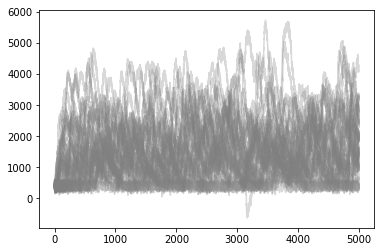

In [6]:
#code used for creation of set1 of simulated data

def alphaKernel (t, A,t_A,t_B):
    return np.float64(A*(np.exp(-t/t_A)-np.exp(-t/t_B)))

xMatrix = np.ndarray(shape=(5000,40),dtype='float32')
apList = []
for i in np.nditer(xMatrix,order='F',flags=['external_loop'],op_flags=['writeonly']):
    localAPlist = []
    xtest = np.repeat(400,5000.)
    xnoise = 80. * np.random.normal(size = xtest.size)
    xtest = xtest +xnoise
    apNumber = int(np.random.normal(loc=4,scale = 2)*10)
    
    for j in range(apNumber):
        xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
        y = (alphaKernel(xdata,np.random.normal(loc=5,scale=0.3) * 400,
                        30* np.random.normal(loc=4,scale=1),10*np.random.normal(loc=4,scale=1)))
        APposition = int(np.random.sample(size=1)* 5000)
        localAPlist.append(APposition)
        APend = APposition + y.size 
        if(APend > xtest.size):
            y.resize(xtest.size-APposition)
        xtest[APposition:APend] = xtest[APposition:APend] + y
        if (APend < 4999 and xtest[APend] - xtest[APend+1] > 80 ):
            corrector = np.arange(xtest[APend] - xtest[APend+1],0,-10)
            if(APend+ corrector.size > xtest.size):
                corrector.resize(xtest.size-APend)
            xtest[APend:APend+corrector.size] = xtest[APend:APend+corrector.size] + corrector
    i[...] = xtest
    plt.plot(xtest,'grey',alpha=0.3)
    apList.append(sorted(localAPlist))
plt.show()
np.savetxt('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/set100-200',xMatrix,delimiter=',',fmt='%4.6f')

df = pd.DataFrame(apList)
df.to_csv('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/100-200aps.csv')

[]

[1835.7959987054762, 2231.5499289338036, 2016.5688714369714, 1844.6903180244822, 2248.072070418118] [77.49949957132353, 113.24314477317957, 144.74707480478946, 102.13289336427091, 147.8347101632229] [54.98610979846562, 34.982240911390775, 53.89255332087763, 23.90595014254043, 41.40430022612339]


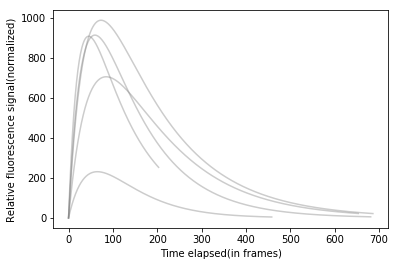

In [43]:
set1,set2,set3 = list(),list(),list()
for i in range(5):
    xdata = np.arange(0,int(500*np.random.normal(loc=1,scale=0.3)),1.)
    set1.append(400*np.random.normal(loc=5,scale=0.3))
    set2.append(30* np.random.normal(loc=4,scale=1))
    set3.append(10*np.random.normal(loc=4,scale=1))
    y = (alphaKernel(xdata,set1[i],set2[i],set3[i]))
    plt.plot(y,'grey',alpha=0.4)
plt.xlabel("Time elapsed(in frames)")
plt.ylabel("Relative fluorescence signal(normalized)")
plt.savefig('alphakernel')
print set1,set2,set3